In [7]:
import pandas as pd
import numpy as np
import glob
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from PIL import Image
from pathlib import Path

In [20]:
IMAGE_PATH = Path("./SB-FishDisease")
image_path_list_jpg = list(IMAGE_PATH.glob("*/*.jpg"))
image_path_list_jpeg = list(IMAGE_PATH.glob("*/*.jpeg"))
image_path_list_png = list(IMAGE_PATH.glob("*/*.png"))
image_path_list_JPG = list(IMAGE_PATH.glob("*/*.JPG"))
image_path_list_webp = list(IMAGE_PATH.glob("*/*.webp"))

TOTAL_IMAGE_PATH_LIST = image_path_list_jpg + image_path_list_jpeg + image_path_list_png + image_path_list_JPG + image_path_list_webp
#we have total of 460 images


In [21]:
df = pd.read_csv("SB-Fish-Disease.csv")
df["Folder Name"].value_counts()

Folder Name
Healthy Fish                         220
Bacterial gill disease                58
Bacterial Red disease                 55
Bacterial diseases - Aeromoniasis     51
Fungal diseases Saprolegniasis        49
Viral diseases White tail disease     45
Parasitic diseases                    40
Name: count, dtype: int64

In [22]:
df = df.sample(frac=1,random_state=42)
df = df.reset_index(drop=True)


In [23]:
def load_and_preprocess_images(df):
    images = []
    labels = []
    count = 0
    for index, row in df.iterrows():
        image_path = row['Image Path']
        label = row['Folder Name']
        
        try:
            img = Image.open(image_path).resize((224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = img_array / 255.0  # Normalize pixel values
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            # Handle the exception (e.g., print a message or log the error)
            print(f"Error processing image at path {image_path}: {e}")
    
    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)


In [24]:
images, labels = load_and_preprocess_images(df)

Error processing image at path SB-FishDisease/Bacterial Red disease/Bacterial Red disease (27).jpg: [Errno 2] No such file or directory: 'SB-FishDisease/Bacterial Red disease/Bacterial Red disease (27).jpg'
Error processing image at path SB-FishDisease/Healthy Fish/Healthy Fish (18).jpg: [Errno 2] No such file or directory: 'SB-FishDisease/Healthy Fish/Healthy Fish (18).jpg'
Error processing image at path SB-FishDisease/Healthy Fish/Healthy Fish (24).jpeg: [Errno 2] No such file or directory: 'SB-FishDisease/Healthy Fish/Healthy Fish (24).jpeg'
Error processing image at path SB-FishDisease/Healthy Fish/Healthy Fish (51).jpg: [Errno 2] No such file or directory: 'SB-FishDisease/Healthy Fish/Healthy Fish (51).jpg'
Error processing image at path SB-FishDisease/Healthy Fish/Healthy Fish (169).jpg: [Errno 2] No such file or directory: 'SB-FishDisease/Healthy Fish/Healthy Fish (169).jpg'
Error processing image at path SB-FishDisease/Healthy Fish/Healthy Fish (7).png: [Errno 2] No such file o

KeyboardInterrupt: 

In [ ]:
images = np.array(images)
labels = np.array(labels)
label_train, label_test, image_train, image_test = train_test_split(labels,images, test_size=0.33, random_state=42)

In [ ]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(label_train)
test_labels_encoded = label_encoder.transform(label_test)
train_labels_encoded

array([6, 1, 1, 3, 4, 3, 4, 6, 6, 4, 5, 4, 6, 6, 4, 3, 4, 1, 2, 4, 4, 3,
       2, 0, 3, 3, 4, 0, 2, 1, 4, 6, 4, 5, 6, 4, 4, 2, 4, 6, 3, 0, 4, 0,
       5, 2, 0, 5, 2, 4, 2, 0, 4, 1, 3, 4, 4, 4, 4, 2, 0, 0, 4, 4, 0, 4,
       1, 2, 4, 6, 1, 1, 1, 4, 4, 4, 1, 2, 1, 4, 3, 4, 6, 0, 1, 4, 4, 5,
       3, 6, 3, 5, 4, 4, 3, 3, 5, 4, 4, 2, 6, 1, 4, 4, 6, 4, 1, 1, 3, 4,
       4, 4, 2, 6, 4, 4, 2, 4, 5, 4, 0, 4, 0, 2, 0, 4, 2, 4, 2, 1, 4, 4,
       4, 3, 2, 4, 4, 4, 1, 4, 5, 2, 2, 6, 0, 2, 5, 2, 2, 5, 2, 2, 3, 1,
       3, 4, 0, 4, 4, 3, 6, 4, 6, 6, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 4, 2,
       4, 3, 0, 4, 1, 4, 2, 6, 1, 0, 4, 1, 5, 4, 0, 2, 6, 1, 1, 1, 2, 3,
       4, 4, 1, 4, 4, 2, 1, 1, 6, 6, 4, 0, 0, 4, 4, 2, 4, 5, 1, 5, 5, 4,
       3, 5, 0, 3, 6, 0, 6, 2, 0, 3, 4, 5, 2, 1, 4, 6, 4, 6, 6, 4, 4, 4,
       5, 4, 2, 4, 6, 4, 2, 4, 5, 4, 4, 3, 4, 0, 3, 1, 0, 5, 4, 4, 4, 1,
       4, 2, 2, 0, 0, 2, 4, 1, 4, 4, 2, 4, 1, 4, 6, 3, 1, 5, 6, 4, 5, 5,
       1, 0, 4, 4, 4, 4, 3, 6, 0, 2, 4, 4, 0, 3, 0,

In [ ]:
class_mapping = {label_encoder.transform([class_name])[0]: class_name for class_name in label_train}
class_mapping

{6: b'Viral diseases White tail disease',
 1: b'Bacterial diseases - Aeromoniasis',
 3: b'Fungal diseases Saprolegniasis',
 4: b'Healthy Fish',
 5: b'Parasitic diseases',
 2: b'Bacterial gill disease',
 0: b'Bacterial Red disease'}

In [31]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')  # Assuming you have 7 classes
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
# Set device placement to CPU
with tf.device('/CPU:0'):
    # Create TensorFlow Datasets
    train_dataset = tf.data.Dataset.from_tensor_slices((image_train, train_labels_encoded)).batch(32)
    test_dataset = tf.data.Dataset.from_tensor_slices((image_test, test_labels_encoded)).batch(32)

    # Training
    model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
10/10 [==============================] - 11s 1s/step - loss: 3.1936 - accuracy: 0.2533 - val_loss: 1.8297 - val_accuracy: 0.4400
Epoch 2/10
10/10 [==============================] - 11s 1s/step - loss: 1.7356 - accuracy: 0.4013 - val_loss: 1.6195 - val_accuracy: 0.4467
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 1.5064 - accuracy: 0.4704 - val_loss: 1.4872 - val_accuracy: 0.4733
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 1.1260 - accuracy: 0.6118 - val_loss: 1.4044 - val_accuracy: 0.5333
Epoch 5/10
10/10 [==============================] - 12s 1s/step - loss: 0.6896 - accuracy: 0.7829 - val_loss: 1.5698 - val_accuracy: 0.5067
Epoch 6/10
10/10 [==============================] - 10s 1s/step - loss: 0.4463 - accuracy: 0.8816 - val_loss: 1.7444 - val_accuracy: 0.5533
Epoch 7/10
10/10 [==============================] - 11s 1s/step - loss: 0.3715 - accuracy: 0.9013 - val_loss: 1.7006 - val_accuracy: 0.5800
Epoch 8/10
10/10 [==

In [34]:
test_loss, test_acc = model.evaluate(image_test, test_labels_encoded)
print(f'Test accuracy: {test_acc}')

5/5 [==============================] - 2s 310ms/step - loss: 1.7864 - accuracy: 0.6000
Test accuracy: 0.6000000238418579


In [40]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(224,
                                  224,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

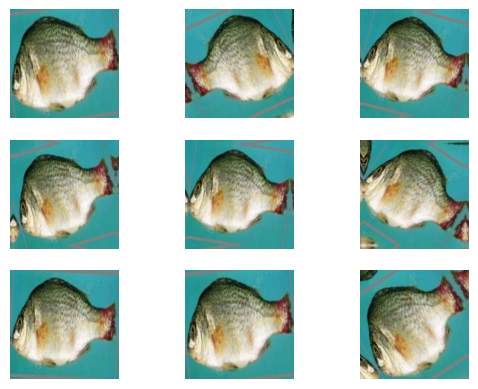

In [59]:
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("float32"))
    plt.axis("off")

In [60]:
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')  # Assuming you have 7 classes
])

In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)      

In [63]:
epochs = 15
history = model.fit(
  train_dataset,
  validation_data= test_dataset,
  epochs=epochs
)

Epoch 1/15


/opt/homebrew/lib/python3.11/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


10/10 [==============================] - 13s 1s/step - loss: 2.6894 - accuracy: 0.2632 - val_loss: 1.6814 - val_accuracy: 0.4267
Epoch 2/15
10/10 [==============================] - 11s 1s/step - loss: 1.7837 - accuracy: 0.3783 - val_loss: 1.7305 - val_accuracy: 0.4333
Epoch 3/15
10/10 [==============================] - 11s 1s/step - loss: 1.7097 - accuracy: 0.3914 - val_loss: 1.6337 - val_accuracy: 0.4400
Epoch 4/15
10/10 [==============================] - 11s 1s/step - loss: 1.5999 - accuracy: 0.4013 - val_loss: 1.5392 - val_accuracy: 0.4600
Epoch 5/15
10/10 [==============================] - 11s 1s/step - loss: 1.5218 - accuracy: 0.4441 - val_loss: 1.5385 - val_accuracy: 0.4867
Epoch 6/15
10/10 [==============================] - 11s 1s/step - loss: 1.4505 - accuracy: 0.4441 - val_loss: 1.6351 - val_accuracy: 0.5000
Epoch 7/15
10/10 [==============================] - 11s 1s/step - loss: 1.3822 - accuracy: 0.5197 - val_loss: 1.5349 - val_accuracy: 0.5333
Epoch 8/15
10/10 [=============

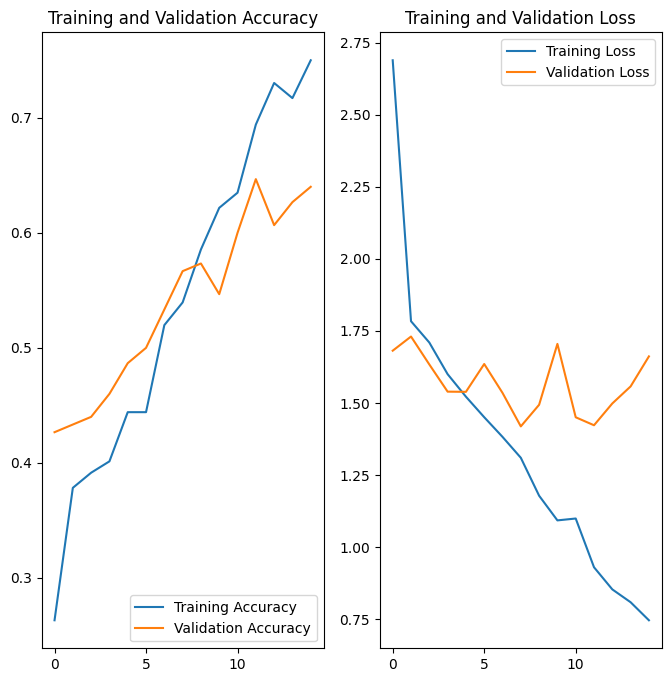

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [66]:
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/1g/05kf8f9j72zgt0jm2kqgq2tm0000gn/T/tmpat25xwr3/assets


INFO:tensorflow:Assets written to: /var/folders/1g/05kf8f9j72zgt0jm2kqgq2tm0000gn/T/tmpat25xwr3/assets
2024-01-27 22:38:16.994940: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-01-27 22:38:16.995085: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-01-27 22:38:16.996307: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/1g/05kf8f9j72zgt0jm2kqgq2tm0000gn/T/tmpat25xwr3
2024-01-27 22:38:16.998690: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-01-27 22:38:16.998700: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/1g/05kf8f9j72zgt0jm2kqgq2tm0000gn/T/tmpat25xwr3
2024-01-27 22:38:17.008025: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-01-27 22:38:17.280770: I tensorflow/cc/saved_model/loader.cc:217] Running initialization

In [38]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)